### Importing Data and required Libraries for Analysis

In [28]:
import numpy as np #for arrays
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
%matplotlib inline 

### Reading the Data

In [31]:
customers = pd.read_csv('Ecommerce Customers')

In [32]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### Exploratory Data Analysis

#### Creating jointplot to compare Time on Website and Yearly Amount Spent

E:\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


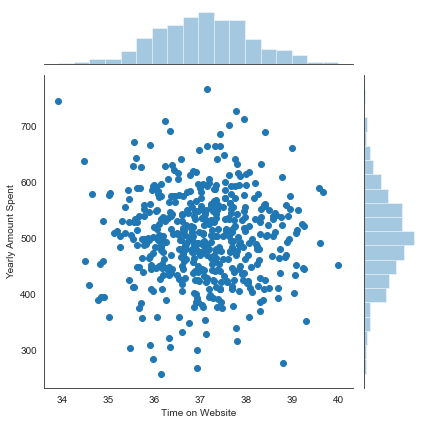

In [35]:
sns.set_style('white')
sns.jointplot(data=customers, x= 'Time on Website', y= 'Yearly Amount Spent')

#### Creating jointplot to compare Time on App and Yearly Amount Spent

E:\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


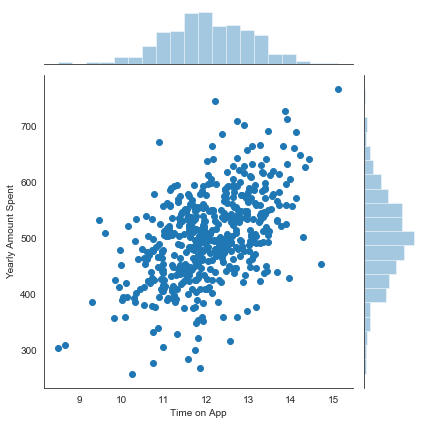

In [36]:
sns.jointplot(data=customers, x= 'Time on App', y= 'Yearly Amount Spent')

#### Creating a 2D hex bin plot to compare Time on App and Length of Membership

E:\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


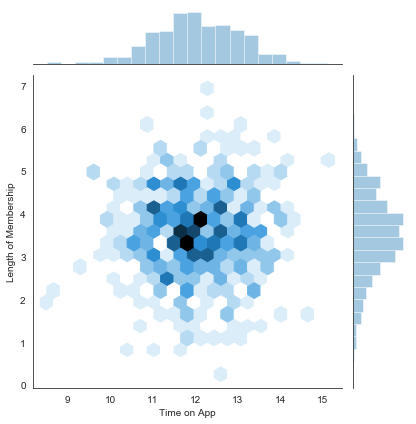

In [37]:
sns.jointplot(data=customers, x= 'Time on App', y= 'Length of Membership', kind = 'hex')

#### Checking relationship across entire dataset

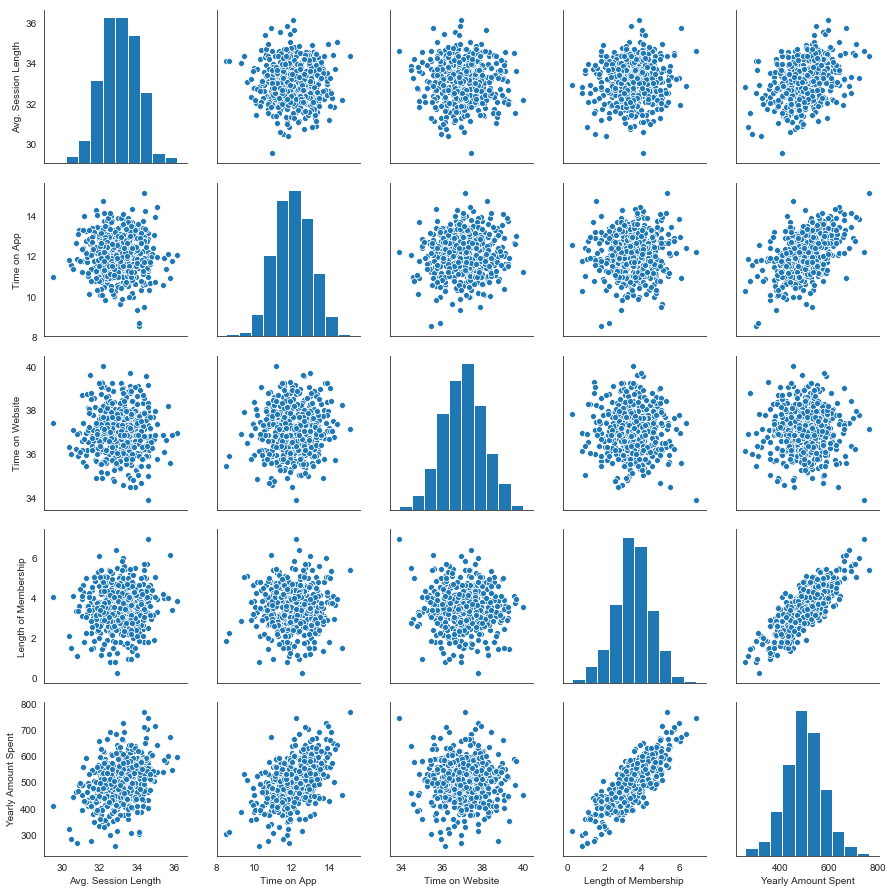

In [38]:
sns.pairplot(customers)

#### From the above plot it can be noticed that there is corelation betweem Yearly Amount Spent & Length of Membership

### Creating a Linear Model plot

E:\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


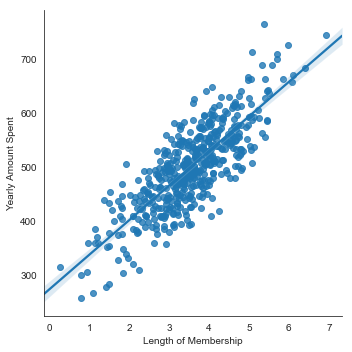

In [39]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data= customers)

### Creating Training and Testing Data

In [41]:
# Prediction of yearly amount spent
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [42]:
y= customers['Yearly Amount Spent']

In [46]:
X= customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

#### Cross Validation to split the data in Training and Test set

In [47]:
from sklearn.cross_validation import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Creating instance of Linear Regression
lm = LinearRegression()

In [53]:
# Model fitting
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Checking the Coefficients
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Predicting Test Data

In [55]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Values')

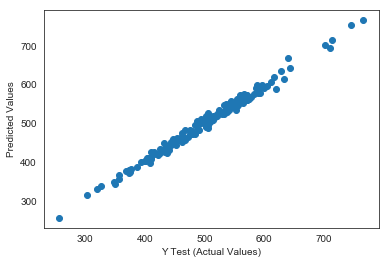

In [58]:
# Checking the correctness of our model predictions
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (Actual Values)')
plt.ylabel('Predicted Values')

### Evaluating Model Performance

In [59]:
# Residual sum of Squares & Variance Explained (R^2)
from sklearn import metrics

In [62]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.228148653430853
MSE 79.81305165097487
RMSE 8.933815066978656


In [63]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

### Residuals

E:\Anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


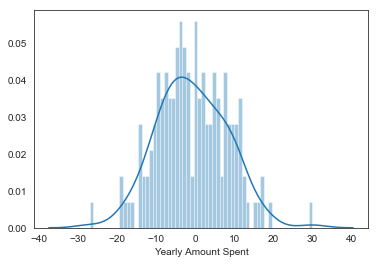

In [64]:
sns.distplot((y_test-predictions), bins = 60)

### Conclusions

In [67]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### It can be seen that the Length of Membership has the biggest impact and Time on website has the least impact on Yearly Amount Spent.